<a href="https://colab.research.google.com/github/Marziesoltani/shortest-path-with-fibonacci-heap/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Numerical Example

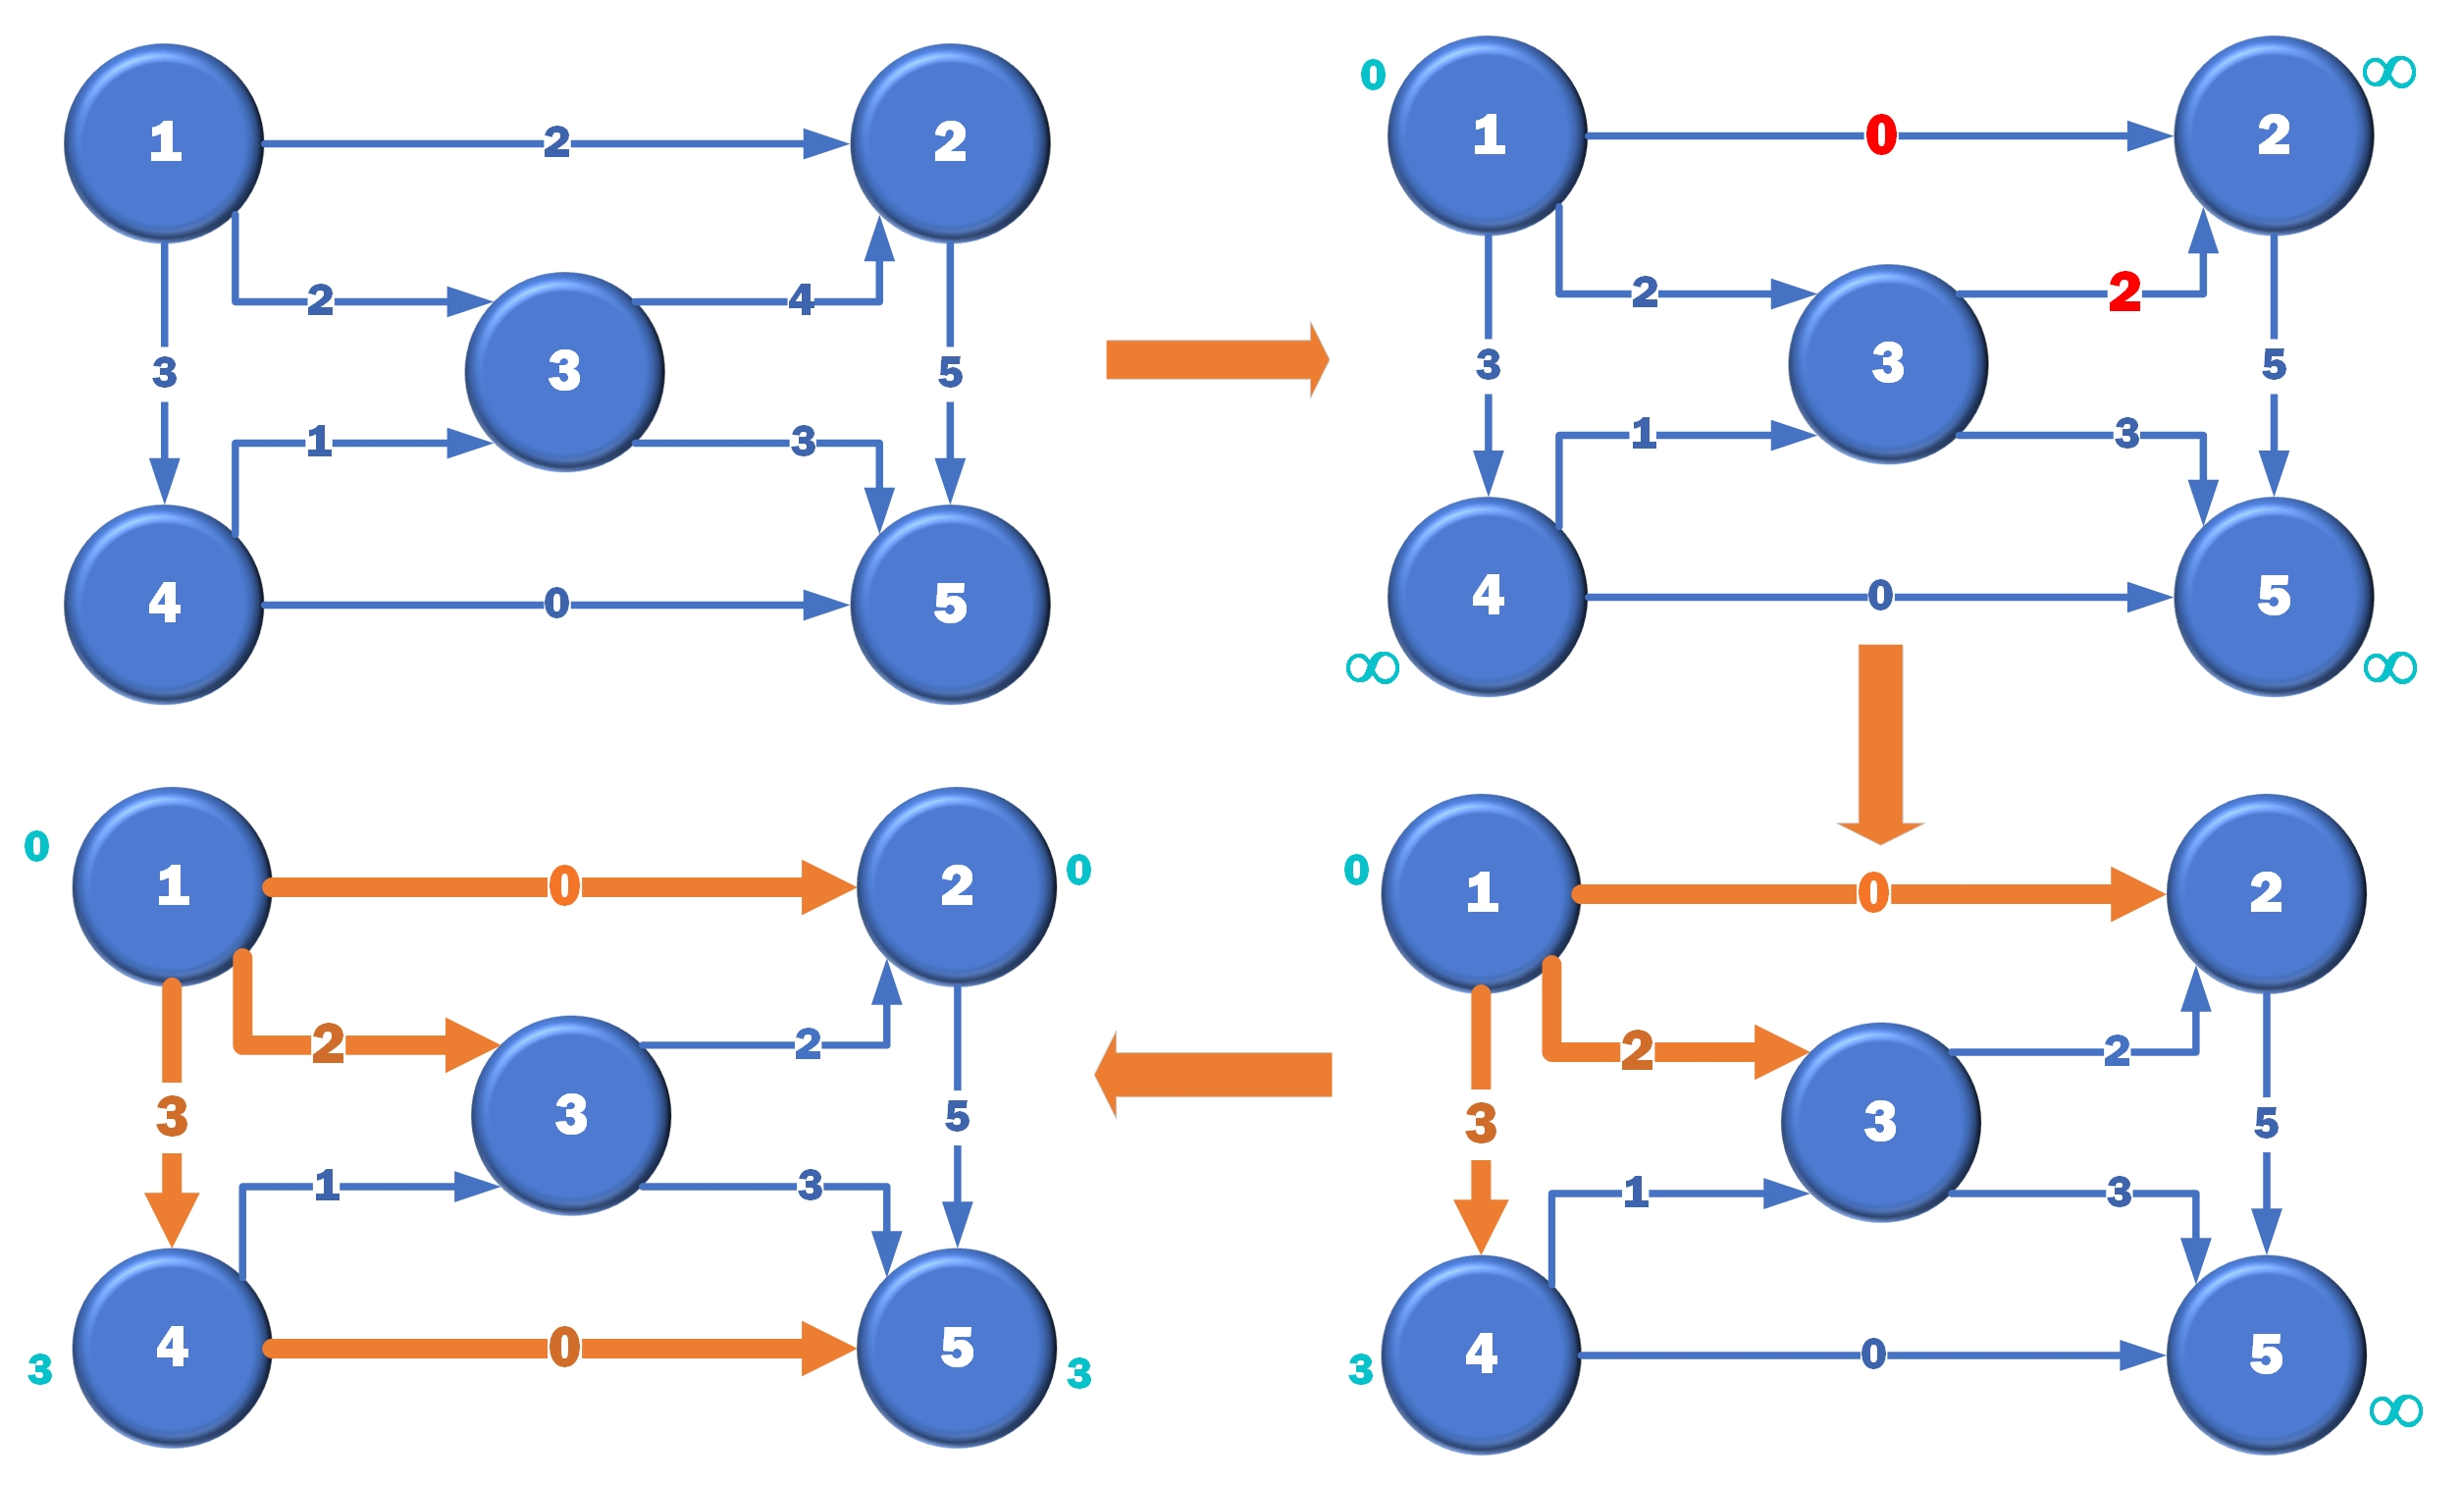

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving sample_graph.txt to sample_graph.txt


In [ ]:
from io import BytesIO

file = BytesIO(uploaded['sample_graph.txt'])
filename = open("sample_graph.txt", "r")
filename

<_io.TextIOWrapper name='sample_graph.txt' mode='r' encoding='UTF-8'>

# Regular Shortest path

***Deque (Double Ended Queue) in Python is implemented using the module “collections“. Deque is preferred over list in the cases where we need quicker append and pop operations from both the ends of container, as deque provides an O(1) time complexity for append and pop operations as compared to list which provides O(n) time complexity.***

In [ ]:
from collections import deque

INFINITY = float("inf")


class Graph:
    # Reading the graph form the .txt file defined by the user
    # The sample .txt file has been provided 
    def __init__(self, filename, end_node):
        
        # Define the minimum variable as infinity
        minimum=INFINITY
        
        # Creating a list to assign the edges
        graph_edges = []
        
        # Creating two lists to assign the costs and the end points of each edge
        c=[]
        e=[]
        
        # Opening the .txt file
        with open(filename) as fhandle:
            for line in fhandle:
                
                # Removing any redundant spaces between words and numbers
                edge_from, edge_to, cost, *_ = line.strip().split(" ")
                
                # Assigning the costs and end points to lists c & e
                c.append(cost)
                e.append(edge_to)
                
        # Finding the minimum value of the costs (weights) of the edges ending at the defined end node
        for i in range(len(e)):
            if e[i]==end_node:
                minimum=min(minimum, int(c[i])) 
                
        # Update the costs (weights)
        with open(filename) as fhandle:
            for line in fhandle:
                edge_from, edge_to, cost, *_ = line.strip().split(" ")
                if edge_to==end_node:
                    graph_edges.append((edge_from, edge_to, float(cost)-minimum))  
                else:
                    graph_edges.append((edge_from, edge_to, float(cost))) 
                    
        # Create a set of nodes
        self.nodes = set()
        for edge in graph_edges:
            self.nodes.update([edge[0], edge[1]]) # This removes the repeated nodes and returns a set
            
        # Adjacency list describes the set of neighbors of a particular vertex in the graph    
        # Defining a set for each node
        self.adjacency_list = {node: set() for node in self.nodes}
        
        # Appending the adjacent nodes and their corresponding costs
        for edge in graph_edges:
            self.adjacency_list[edge[0]].add((edge[1], edge[2]))
    
    
    def shortest_path(self, start_node, end_node):
        
        # Defining the set of unvisited nodes
        unvisited_nodes = self.nodes.copy()  # All nodes are initially unvisited.

        # Create a dictionary of each node's distance from start_node. We will
        # update each node's distance whenever we find a shorter path.
        distance_from_start = {
            node: (0 if node == start_node else INFINITY) for node in self.nodes
        }

        # Initialize previous_node, the dictionary that maps each node to the
        # node it was visited from when the the shortest path to it was found.
        previous_node = {node: None for node in self.nodes}
                
        while unvisited_nodes:
            # Set current_node to the unvisited node with shortest distance
            # calculated so far.
            
            current_node = min(
                unvisited_nodes, key=lambda node: distance_from_start[node]
            )
            unvisited_nodes.remove(current_node)

            # If current_node's distance is INFINITY, the remaining unvisited
            # nodes are not connected to start_node, so we're done.
            if distance_from_start[current_node] == INFINITY:
                break
                
            # For each neighbor of current_node, check whether the total distance
            # to the neighbor via current_node is shorter than the distance we
            # currently have for that node. If it is, update the neighbor's values
            # for distance_from_start and previous_node.
            for neighbor, distance in self.adjacency_list[current_node]:
                new_path = distance_from_start[current_node] + distance
                if new_path < distance_from_start[neighbor]:
                    distance_from_start[neighbor] = new_path
                    previous_node[neighbor] = current_node

            if current_node == end_node:
                break # we've visited the destination node, so we're done

        # To build the path to be returned, we iterate through the nodes from
        # end_node back to start_node. Note the use of a deque, which can
        # appendleft with O(1) performance.
        path = deque()
        current_node = end_node
        while previous_node[current_node] is not None:
            path.appendleft(current_node) # This function is used to insert the value in its argument to the left end of deque
            current_node = previous_node[current_node]
        path.appendleft(start_node)
        
        # Returning the shortest path and its distance
        return path, distance_from_start[end_node]

# Defining a list of start nodes    
start_node = []

# Inputting the start_node
for i in range(0, 1):
    node = str(input("Enter the start node : "))
    start_node.append(node) 

# Inputting the number of destinations    
number_of_end_nodes = int(input("Enter the number of end nodes : "))

print("Enter each end node in a line and click Enter on your keyboard")

# Inputting the list of end nodes
end_node=[]
for i in range(number_of_end_nodes):
    nodes=str(input())
    end_node.append(nodes)
    
# Calculate the shortest path according to the inputted source node and destination nodes
for start_node in start_node:
    for end_node in end_node:
        graph=Graph("sample_graph.txt", end_node)
        x, y=graph.shortest_path(start_node, end_node)
        print(x,y)

Enter the start node : 1
Enter the number of end nodes : 2
Enter each end node in a line and click Enter on your keyboard
2
5
deque(['1', '2']) 0.0
deque(['1', '4', '5']) 3.0


#Shortest path with Fibonacci Heap

In [ ]:
import heapq
from collections import defaultdict

INFINITY = float("inf")


class Graph:
    # Reading the graph form the .txt file defined by the user
    # The sample .txt file has been provided 
    def __init__(self, filename, end_node):
        
        # Define the minimum variable as infinity
        minimum=INFINITY
        
        # Creating a list to assign the edges
        graph_edges = []
        
        # Creating two lists to assign the costs and the end points of each edge
        c=[]
        e=[]
        
        # Opening the .txt file
        with open(filename) as fhandle:
            for line in fhandle:
                
                # Removing any redundant spaces between words and numbers
                edge_from, edge_to, cost, *_ = line.strip().split(" ")
                
                # Assigning the costs and end points to lists c & e
                c.append(cost)
                e.append(edge_to)
                
        # Finding the minimum value of the costs (weights) of the edges ending at the defined end node
        for i in range(len(e)):
            if e[i]==end_node:
                minimum=min(minimum, int(c[i])) 
                
        # Update the costs (weights)
        with open(filename) as fhandle:
            for line in fhandle:
                edge_from, edge_to, cost, *_ = line.strip().split(" ")
                if edge_to==end_node:
                    graph_edges.append((edge_from, edge_to, float(cost)-minimum))  
                else:
                    graph_edges.append((edge_from, edge_to, float(cost))) 
                    
        # Create a set of nodes
        self.nodes = set()
        for edge in graph_edges:
            self.nodes.update([edge[0], edge[1]]) # This removes the repeated nodes and returns a set
            
        # Defining a set for each node"
        self.adjacency_list = {node: set() for node in self.nodes}
        
        # Appending the adjacent nodes and their corresponding costs
        for edge in graph_edges:
            self.adjacency_list[edge[0]].add((edge[1], edge[2]))
    
    
    def shortest_path(self, src, dest):
        h=[]
    # keep a track record of vertices with cost
    # heapop will return vertex with least cost
    # greedy SRC -> MIN -> MIN -> MIN -> DEST
    
        heapq.heappush(h,(0,src))

        while len(h)!=0:
            currcost,currvtx=heapq.heappop(h)
            if currvtx==dest:
                print("Path exists {} to {} with cost {}".format(src, dest, currcost))
                break;
            for neigh, neighcost in self.adjacency_list[currvtx]:
                heapq.heappush(h, (currcost+neighcost, neigh))
            

# Defining a list of start nodes    
start_node = []

# Inputting the start_node
for i in range(0, 1):
    node = str(input("Enter the start node : "))
    start_node.append(node) 

# Inputting the number of destinations    
number_of_end_nodes = int(input("Enter the number of end nodes : "))

print("Enter each end node in a line and click Enter on your keyboard")

# Inputting the list of end nodes
end_node=[]
for i in range(number_of_end_nodes):
    nodes=str(input())
    end_node.append(nodes)
    
# Calculate the shortest path according to the inputted source node and destination nodes
for start_node in start_node:
    for end_node in end_node:
        graph=Graph("sample_graph.txt", end_node)
        graph.shortest_path(start_node, end_node)

Enter the start node : 1
Enter the number of end nodes : 2
Enter each end node in a line and click Enter on your keyboard
2
5
Path exists 1 to 2 with cost 0.0
Path exists 1 to 5 with cost 3.0
